## Task-D: Collinear features and their effect on linear models

In [201]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [202]:
data = pd.read_csv('task_d.csv',index_col=False)
data.shape

(100, 8)

In [203]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [204]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

1. <b>Finding the Correlation between the features</b>
   * a. check the correlation between the features
   * b. plot heat map of correlation matrix using seaborn heatmap

In [205]:
data.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


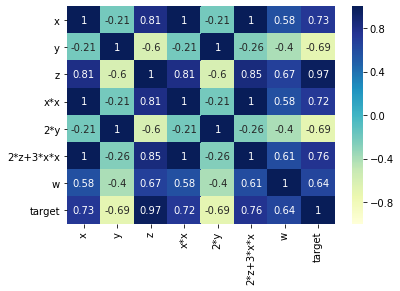

In [206]:
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='YlGnBu',annot=True)
plt.show()

2. Finding the best model for the given data
    * Train Logistic regression on data(X,Y) that we have created in the above cell
    * Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         random search CV make sure you choose the alpha in log space)
    * Creat a new Logistic regression with the best alpha(search for how to get the best hyper parameter value), name the best model as 'best_model'

In [207]:
random_state=25
param_grid = {'alpha':[0.00001,0.0001,0.01,1,100]}
reg = SGDClassifier(loss='log',random_state=random_state)
grid = GridSearchCV(reg,param_grid)
grid.fit(X,Y)
print(grid.best_params_)

{'alpha': 1e-05}


In [208]:
best_model = SGDClassifier(loss='log', alpha=grid.best_params_['alpha'],random_state=random_state)

3. Getting the weights with the original data
    * train the 'best_model' with X, Y
    * Check the accuracy of the model 'best_model_accuracy'
    * Get the weights W using best_model.coef_

In [209]:
best_model.fit(X,Y)
pred_y = best_model.predict(X)
best_model_accuracy = best_model.score(X,pred_y)
w = best_model.coef_
print(best_model_accuracy)
print(w)

1.0
[[ 28.38861834 -40.07905954  72.08276002  26.15892423 -40.07905954
   32.24598196  28.30635109]]


4. Modifying original data
    * Add a noise(order of 10^-2) to each element of X and get the new data set X' (X' = X + e)
    * Train the same 'best_model' with data (X', Y)
    * Check the accuracy of the model 'best_model_accuracy_edited'
    * Get the weights W' using best_model.coef_

In [210]:
X_edited = X+1e-2
best_model.fit(X_edited,Y)
pred_y = best_model.predict(X_edited)
best_model_accuracy_edited = best_model.score(X_edited,pred_y)
w_edited = best_model.coef_
print(best_model_accuracy_edited)
print(w_edited)

1.0
[[ 29.20989872 -39.46083428  72.84693273  26.92055035 -39.46083428
   33.02210425  28.20739811]]


5.  Checking deviations in metric and weights 
    * find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    * find the absolute change between each value of W and W' ==> |(W-W')|
    * print the top 4 features which have higher % change in weights compare to the other feature

In [211]:
print(best_model_accuracy_edited-best_model_accuracy)
print(abs(w-w_edited))

0.0
[[0.82128038 0.61822527 0.76417271 0.76162611 0.61822527 0.77612229
  0.09895298]]


In [212]:
top4 = np.argsort(abs(w-w_edited)[0])[::-1][:4]
print(data.columns[top4])

Index(['x', '2*z+3*x*x', 'z', 'x*x'], dtype='object')


Task: 2 Linear SVM
* Do the same steps (2, 3, 4, 5) we have done in the above task 1.

In [213]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

In [214]:
param_grid = {'alpha':[0.00001,0.0001,0.01,1,100]}
reg = SGDClassifier(loss='hinge',random_state=random_state)
grid = GridSearchCV(reg,param_grid)
grid.fit(X,Y)
print(grid.best_params_)

{'alpha': 1e-05}


In [215]:
best_model = SGDClassifier(loss='hinge', alpha=grid.best_params_['alpha'],random_state=random_state)

In [216]:
best_model.fit(X,Y)
pred_y = best_model.predict(X)
best_model_accuracy = best_model.score(X,pred_y)
w = best_model.coef_
print(best_model_accuracy)
print(w)

1.0
[[ 24.77242963 -23.24335792  29.609463    27.36249797 -23.24335792
   28.20131614  16.42805131]]


In [217]:
X_edited = X+1e-2
best_model.fit(X_edited,Y)
pred_y = best_model.predict(X_edited)
best_model_accuracy_edited = best_model.score(X_edited,pred_y)
w_edited = best_model.coef_
print(best_model_accuracy_edited)
print(w_edited)

1.0
[[ 24.77242963 -23.24335792  29.609463    27.36249797 -23.24335792
   28.20131614  16.42805131]]


In [218]:
print(best_model_accuracy_edited-best_model_accuracy)
print(abs(w-w_edited))

0.0
[[3.55271368e-15 0.00000000e+00 3.55271368e-15 3.55271368e-15
  0.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [219]:
top4 = np.argsort(abs(w-w_edited)[0])[::-1][:4]
print(data.columns[top4])

Index(['x*x', 'z', 'x', 'w'], dtype='object')


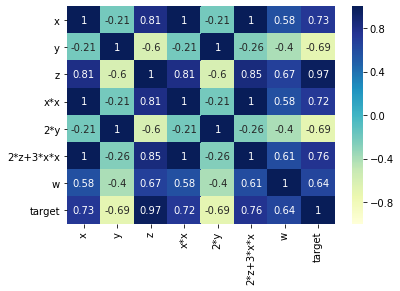

In [220]:
data_edited = pd.DataFrame(np.concatenate((X_edited,Y.reshape(100,1)),axis=1),columns=['x','y','z','x*x','2*y','2*z+3*x*x','w','target'])
sns.heatmap(data_edited.corr(),vmin=-1,vmax=1,cmap='YlGnBu',annot=True)
plt.show()                                                   

Observations:
* From the deviations in weight, we observe that the deviations in weights for LR is much greater than that of SVM. This is expected as SVM finds optimal hyperplane seperating the classes and hence a little added noise would not affect the decision boundary much.